# Raw Data Statistics
A look into the raw distribution of the data.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

TRAINSET = '../data/raw/0173eeb640e7-Challenge+Data+Set+-+Campus+Analytics+2020.xlsx'

In [2]:
# Load in data and visually inspect/verify
df = pd.read_excel(TRAINSET)
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,XC,y
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,...,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,C,0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,...,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,E,0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,...,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,E,0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,...,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,E,0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,...,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,E,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.127214,-0.644439,-0.356251,-1.188522,0.646979,-1.018895,-0.153524,-0.102938,1.109257,0.173160,...,-1.362069,-2.267345,0.329806,0.255234,-1.145799,0.673261,-0.072575,0.233888,A,1
2996,0.427700,1.460896,-1.260326,2.206359,-0.981929,0.045186,0.406928,-0.409999,0.602068,-1.145479,...,0.558446,-1.430444,0.067506,-0.865400,0.571944,1.172911,-0.917354,0.126003,C,0
2997,-0.880540,0.678472,0.493897,-0.118869,0.005285,-0.201233,-0.601732,-0.747260,-0.413440,-1.144848,...,0.924523,-0.304820,0.153800,0.316073,0.243841,-1.641217,0.287025,0.591607,B,1
2998,0.151291,-0.949928,-1.960683,-1.352557,2.221015,-0.775556,0.932388,-0.963642,0.649496,-1.658190,...,0.896517,-0.586427,-0.314806,-0.048052,0.142921,1.057203,-1.335579,-0.108947,B,0


In [10]:
feat_df = df.drop(['XC', 'y'], axis=1)
feat_df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,...,1.385378,0.217853,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,...,0.129662,2.020398,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,...,0.640268,1.470933,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,...,2.565787,0.881025,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,...,0.909173,0.515647,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431


In [7]:
print('Mean:', feat_df.stack().mean(), 'Std:', feat_df.stack().std())

Mean: 0.0009246602316219637 Std: 0.9997813554876392


From the results above, it appears that the entire data set follows some form of data distribution with a mean ~0 and std ~1. Therefore, it is not necessary to apply a normalization transform when preprocessing the data during the training and test phase.

Below is a visual histogram of each column in the dataframe.

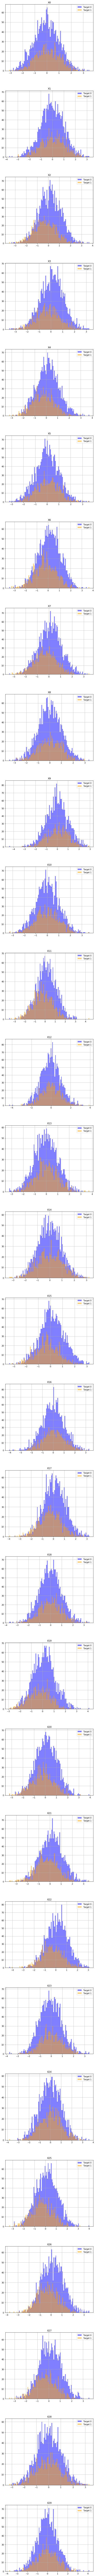

In [55]:
feat_df_0 = df.loc[df['y'] == 0].drop(['XC', 'y'], axis=1)
feat_df_1 = df.loc[df['y'] == 1].drop(['XC', 'y'], axis=1)

fig, ax = plt.subplots(30, 1, figsize=(8, 30*8))
for i, col in enumerate(feat_df.columns):
    feat_df_0.hist(column=col, ax=ax[i], bins=100, color='blue', alpha=0.5, label='Target 0')
    feat_df_1.hist(column=col, ax=ax[i], bins=100, color='orange', alpha=0.5, label='Target 1')
    ax[i].legend()

From the visualizations above, we can see that there are clearly more data samples labelled with target 0 than target 1. 
Also, these histograms are plotted with the raw data values (no normalization) and appear to follow some form of unimodal normal distribution.

In the demonstration below, the data is assumed, for now, to follow a Gaussian distribution and the probability density functions of each target label for each feature are graphed on top of each other. This is to see if features from different target labels follow any sort of different distribution, even if the differences are small. The graphs above do not highlight or make this observation very perceptable because histograms are mere binnings of data value counts.

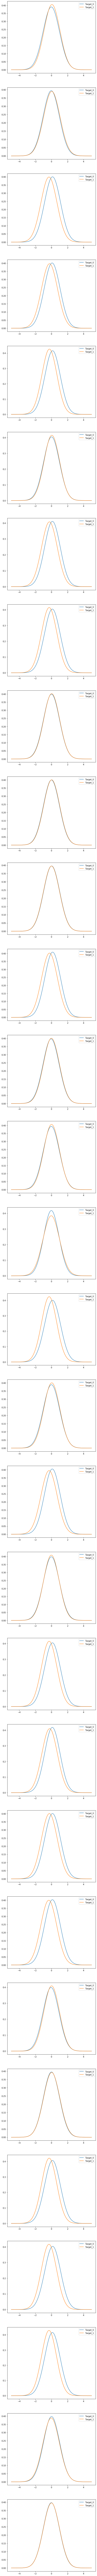

In [54]:
fig, ax = plt.subplots(30, 1, figsize=(8, 30*8))

x_axis = np.arange(-5, 5, 0.001)
for i, col in enumerate(feat_df.columns):
    mean_0, std_0 = feat_df_0[col].mean(), feat_df_0[col].std()
    mean_1, std_1 = feat_df_1[col].mean(), feat_df_1[col].std()
    ax[i].plot(x_axis, norm.pdf(x_axis, mean_0, std_0), label='Target_0')
    ax[i].plot(x_axis, norm.pdf(x_axis, mean_1, std_1), label='Target_1')
    ax[i].legend()

From the visualizations above, it appears that the distributions of features between target labels are very similar.

# 'XC' Column
A consideration of the 'XC' char-valued column.

The counts and ratio of the binary split between target labels are demonstrated per value from the 'XC' column.

In [59]:
# Char values in column 'XC' for each target label 0 and 1
cr_tab = pd.crosstab(df.XC, df.y)
cr_tab

y,0,1
XC,,
A,338,277
B,329,223
C,464,201
D,455,125
E,483,105


In [60]:
# Normalize values by row
cr_tab.div(cr_tab.sum(axis=1), axis=0)

y,0,1
XC,,
A,0.549593,0.450407
B,0.596014,0.403986
C,0.697744,0.302256
D,0.784483,0.215517
E,0.821429,0.178571


Due to the class imbalance many examples will be __biased__ towards target label 0 due to the larger number of data samples that target label 0 has.